In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('/content/sample_data/dataset_phishing.csv')
df.head()


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [4]:
df.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [5]:
df['status'].value_counts()
#This shows that this is a balanced dataset

,count
status,
legitimate,5715
phishing,5715


In [6]:

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
X = df.drop(columns=['url', 'status'])  # Drop non-numeric and target columns
y = df['status']
y_encoded = label_encoder.fit_transform(y)
print("Check for NaN values:\n", X.isnull().sum())


Check for NaN values:
 length_url         0
length_hostname    0
ip                 0
nb_dots            0
nb_hyphens         0
                  ..
domain_age         0
web_traffic        0
dns_record         0
google_index       0
page_rank          0
Length: 87, dtype: int64


In [7]:
y_encoded

array([0, 1, 1, ..., 0, 0, 1])

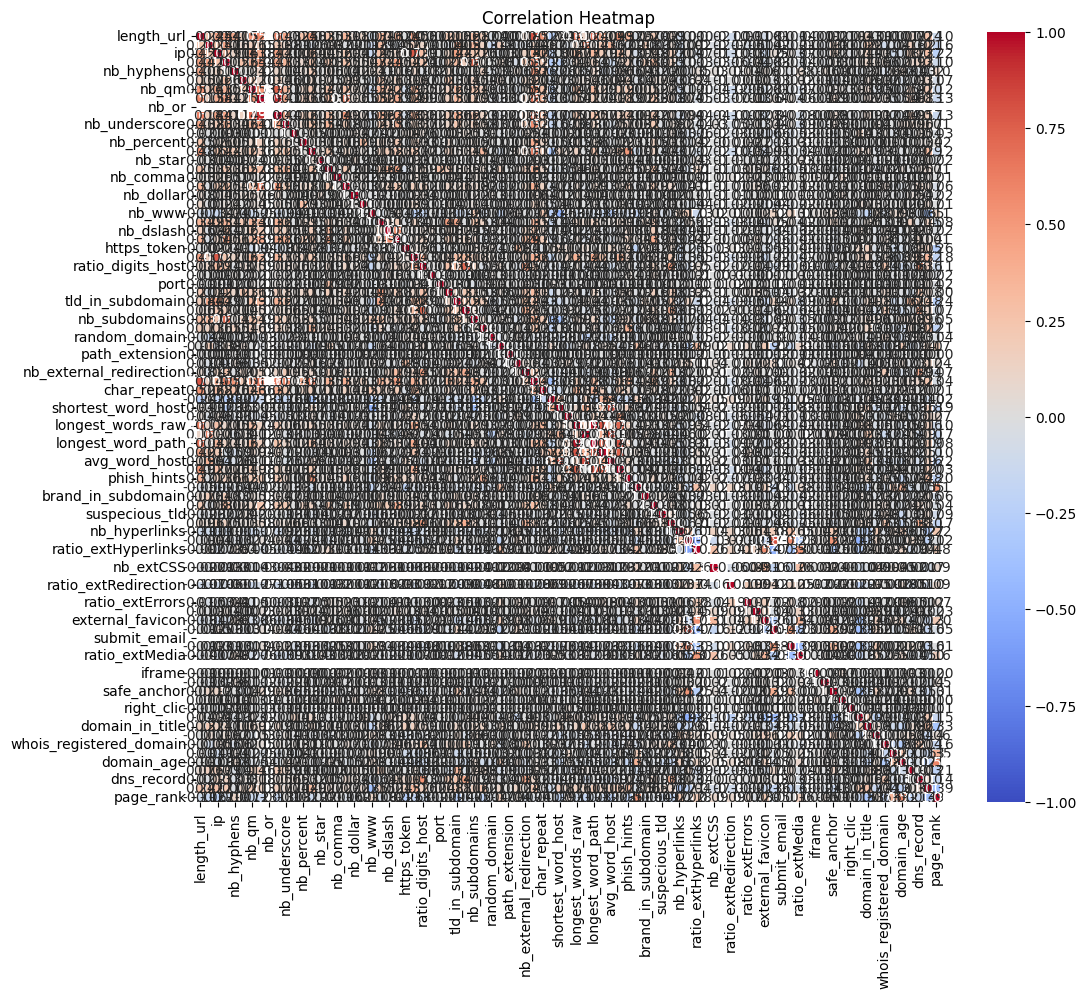

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(12, 10))  # Set figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Display the heatmap
plt.title("Correlation Heatmap")
plt.show()


In [9]:
df.shape

(11430, 89)

In [10]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to retain 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Display explained variance
print(f"Number of components retained: {pca.n_components_}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

# Split the PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.3, random_state=42)



Number of components retained: 60
Explained variance ratio: [0.10140136 0.05367566 0.04741029 0.04531195 0.03605145 0.03347285
 0.02897466 0.02522375 0.02227331 0.02173559 0.01886836 0.01791782
 0.01725746 0.01643569 0.01549799 0.01513982 0.01443361 0.01421693
 0.01372607 0.01339485 0.01325806 0.01306489 0.01287095 0.01248628
 0.01246969 0.01232408 0.01228254 0.01217532 0.01195323 0.01156596
 0.01152096 0.01126165 0.01097694 0.01083469 0.0107304  0.01061164
 0.01056277 0.00996661 0.00979557 0.00968709 0.00945111 0.00931343
 0.00905755 0.00895506 0.00873807 0.00839725 0.00812733 0.00803912
 0.00774221 0.00756617 0.0073587  0.00714911 0.00693077 0.00673622
 0.00639598 0.00625299 0.0057427  0.00557202 0.00531065 0.00508231]


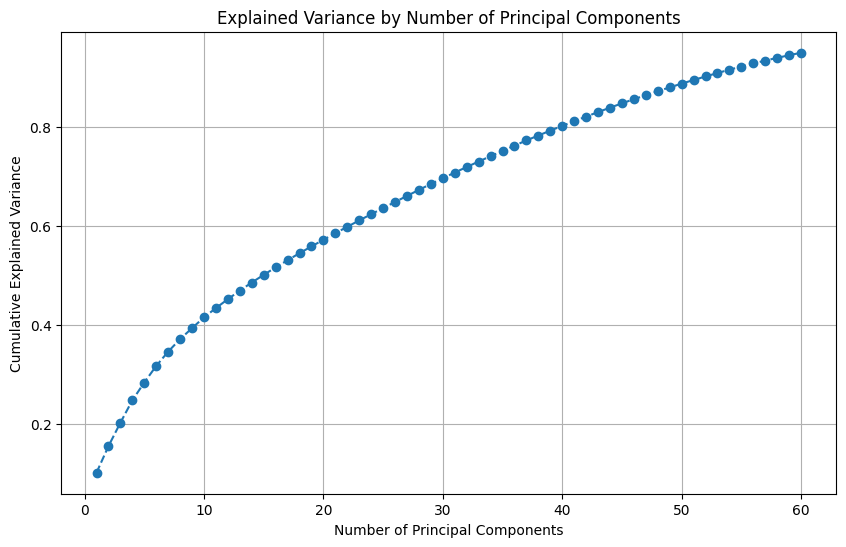

In [11]:
import matplotlib.pyplot as plt

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


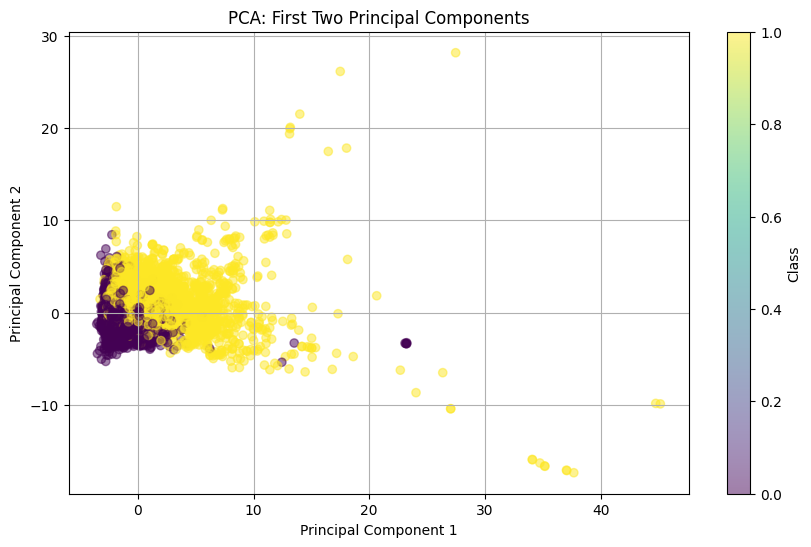

In [12]:
# Scatter plot of the first two PCA components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='viridis', alpha=0.5)
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()


In [26]:
#Logistic Regression

# Train Logistic Regression on PCA-transformed data
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Evaluate the model
y_pred = logistic_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")

Accuracy: 0.9451735199766695
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1732
           1       0.94      0.94      0.94      1697

    accuracy                           0.95      3429
   macro avg       0.95      0.95      0.95      3429
weighted avg       0.95      0.95      0.95      3429

Confusion Matrix:
 [[1638   94]
 [  94 1603]]


In [27]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = tree_model.predict(X_test)
print("Decision Tree Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")

Decision Tree Classifier
Accuracy: 0.8973461650627005
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1732
           1       0.90      0.89      0.90      1697

    accuracy                           0.90      3429
   macro avg       0.90      0.90      0.90      3429
weighted avg       0.90      0.90      0.90      3429

Confusion Matrix:
 [[1560  172]
 [ 180 1517]]


In [28]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
print("Random Forest Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")

Random Forest Classifier
Accuracy: 0.9483814523184602
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1732
           1       0.95      0.95      0.95      1697

    accuracy                           0.95      3429
   macro avg       0.95      0.95      0.95      3429
weighted avg       0.95      0.95      0.95      3429

Confusion Matrix:
 [[1640   92]
 [  85 1612]]


In [29]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
print("XGBoost Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:36:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier
Accuracy: 0.9530475357247011
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1732
           1       0.95      0.95      0.95      1697

    accuracy                           0.95      3429
   macro avg       0.95      0.95      0.95      3429
weighted avg       0.95      0.95      0.95      3429

Confusion Matrix:
 [[1651   81]
 [  80 1617]]


In [30]:
from sklearn.svm import SVC

# Train SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)
print("Support Vector Machine")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")

Support Vector Machine
Accuracy: 0.957713619130942
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1732
           1       0.95      0.96      0.96      1697

    accuracy                           0.96      3429
   macro avg       0.96      0.96      0.96      3429
weighted avg       0.96      0.96      0.96      3429

Confusion Matrix:
 [[1655   77]
 [  68 1629]]


In [31]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = nb_model.predict(X_test)
print("Naive Bayes")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")

Naive Bayes
Accuracy: 0.6969962088072325
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.91      0.75      1732
           1       0.84      0.48      0.61      1697

    accuracy                           0.70      3429
   macro avg       0.74      0.69      0.68      3429
weighted avg       0.74      0.70      0.68      3429

Confusion Matrix:
 [[1582  150]
 [ 889  808]]


In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Train k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn_model.predict(X_test)
print("k-Nearest Neighbors")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")

k-Nearest Neighbors
Accuracy: 0.9405074365704287
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1732
           1       0.94      0.93      0.94      1697

    accuracy                           0.94      3429
   macro avg       0.94      0.94      0.94      3429
weighted avg       0.94      0.94      0.94      3429

Confusion Matrix:
 [[1639   93]
 [ 111 1586]]


In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter space
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(
    rf, param_distributions, n_iter=50, cv=3, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42
)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
best_model = random_search.best_estimator_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}


In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy:", scores.mean())

Cross-validation accuracy: 0.9441327295440349


In [34]:
from sklearn.metrics import classification_report
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1732
           1       0.95      0.96      0.95      1697

    accuracy                           0.95      3429
   macro avg       0.95      0.95      0.95      3429
weighted avg       0.95      0.95      0.95      3429

Confusion Matrix:
 [[1649   83]
 [  75 1622]]


In [39]:
import numpy as np
import pandas as pd
X_train_df = pd.DataFrame(X_train)
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(10):  # Top 10 features
    print(f"Feature {X_train_df.columns[indices[i]]}: {importances[indices[i]]}")

Feature length_url: 0.13683613080644896
Feature length_hostname: 0.11254016866905876
Feature nb_dots: 0.11244302580049119
Feature nb_at: 0.04589572677976532
Feature nb_underscore: 0.042109655934349864
Feature ip: 0.03008866898550121
Feature nb_qm: 0.0254976164383699
Feature nb_hyphens: 0.023975906197424447
Feature avg_word_host: 0.02153840330663102
Feature port: 0.018925892485162667


In [36]:
df.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 